In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_rows', 15)

In [3]:
# -------------------------- Load data -------------------------------

In [4]:
# load bitcoin price data
bitcoin = pd.read_csv ('/home/sunny/NWU/EECS349/Bitcoin_Price_Predictor/data/bitcoin_price.csv', \
                       parse_dates = True, index_col = [0])

In [5]:
# check data
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
2018-02-15,9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
...,...,...,...,...,...,...
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"


In [6]:
# sort the data in ascending order
bitcoin = bitcoin.sort_index(ascending = True)

In [7]:
# check data
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"


In [8]:
# ---------------------------- Deal with abnormal value ------------------------------

In [9]:
# check if there is any missing value
bitcoin.isnull().any()

Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

In [10]:
# deal with '-' value and string value with comma (',') in Volume dataset
# extract string data without '-' data value
bitcoin_vol = bitcoin['Volume']
bitcoin_vol_1 = bitcoin_vol[bitcoin_vol != '-']
bitcoin_vol_1 = bitcoin_vol_1.apply(lambda x: float(x.replace(',', '')))

In [11]:
# use the mean value of between 2014-01 to 2014-09 to replace '-' value in dataset
bitcoin_vol_2014 = pd.DataFrame(bitcoin_vol_1).loc['2014-01-01': '2014-10-01']
bitcoin_vol_2014_mean = bitcoin_vol_2014['Volume'].mean()
print('The mean value between 2014-01-01 to 2014-10-01 is', str(bitcoin_vol_2014_mean))

# extract '-' data value
bitcoin_vol_2 = bitcoin_vol[bitcoin_vol == '-']
bitcoin_vol_2 = bitcoin_vol_2.apply(lambda x: float(x.replace('-', '%f' %(bitcoin_vol_2014_mean))))

The mean value between 2014-01-01 to 2014-10-01 is 25801388.321167883


In [12]:
# update the Volume dataset
bitcoin_vol.update(bitcoin_vol_1)
bitcoin_vol.update(bitcoin_vol_2)

In [13]:
# deal with string value with comma (',') in Market Cap dataset
bitcoin_mc = bitcoin['Market Cap']
bitcoin_mc = bitcoin_mc.apply(lambda x: float(x.replace(',', '')))

In [14]:
# update Volume and Market Cap dataset
bitcoin['Volume'].update(bitcoin_vol)
bitcoin['Market Cap'].update(bitcoin_mc)

In [15]:
# check data
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,147.49,134.00,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,146.93,134.05,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,139.89,107.72,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,125.60,92.28,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,108.13,79.10,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,115.00,92.50,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,7.90982e+09,1.45023e+11


In [16]:
# ------------------------- Exploratory data analysis ---------------------

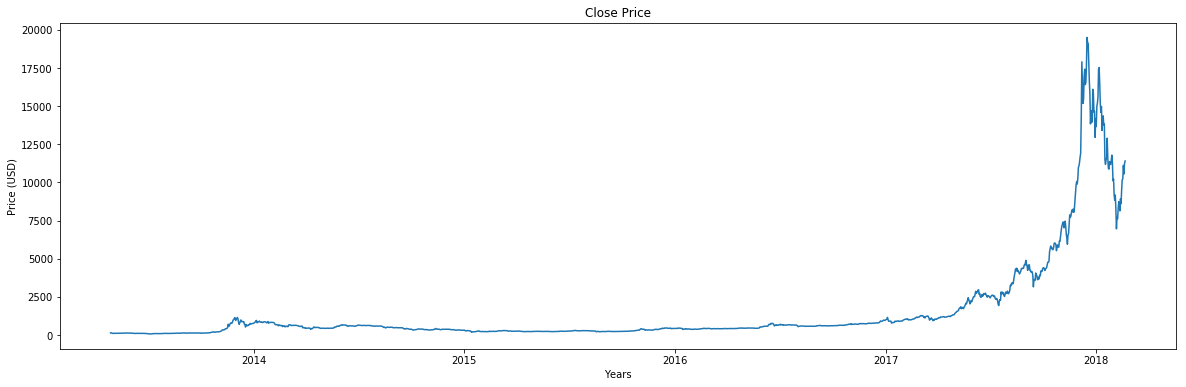

In [17]:
# plot Close dataset
bitcoin_close = bitcoin['Close']
plt.figure(figsize = (20, 6))
plt.plot(bitcoin_close)
plt.xlabel('Years')
plt.ylabel('Price (USD)')
plt.title('Close Price')
plt.show()

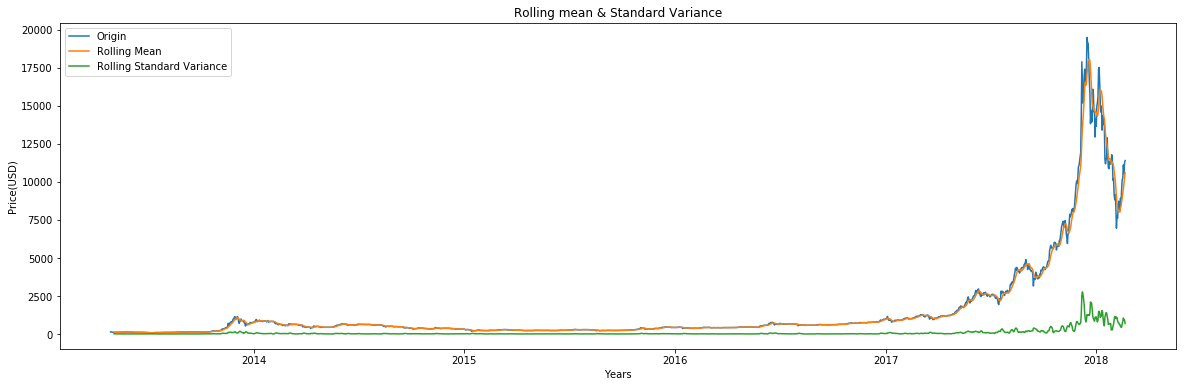

In [18]:
# plot rolling mean and rolling standard deviation
rol_mean = bitcoin_close.rolling(window = 7).mean()
rol_var = bitcoin_close.rolling(window = 7).std()

plt.figure(figsize = (20, 6))
plt.plot(bitcoin_close, label = 'Origin')
plt.plot(rol_mean, label = 'Rolling Mean')
plt.plot(rol_var, label = 'Rolling Standard Variance')
plt.legend(loc = 'best')
plt.title('Rolling mean & Standard Variance')
plt.xlabel('Years')
plt.ylabel('Price(USD)')
plt.show()

In [19]:
# --------------------- change attribute in dataset ------------------

In [20]:
# bitcoin dataset #1
# change dataset by removing the Open, High, Low dataset
bitcoin_1 = bitcoin[['Open', 'Close', 'Volume', 'Market Cap']]

# bitcoin dataset #2
# replace the Open, High, Low, Market Cap dataset with adding Close off high, Volatility datasets
kwargs = {"Close off high": lambda x: 2 * (x['High'] - x['Close']) / (x['High'] - x['Low']) - 1, \
         "Volatility": lambda x: (x['High'] - x['Low']) / (x['Open'])}
bitcoin_2 = bitcoin.assign(**kwargs)
bitcoin_2 = bitcoin_2[['Close', 'Volume', 'Close off high', 'Volatility']]



In [21]:
# check dataset #1
bitcoin_1

,Open,Close,Volume,Market Cap
Date,,,,
2013-04-28,135.30,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...
2018-02-14,8599.92,9494.63,7.90982e+09,1.45023e+11


In [22]:
# check dataset #2
bitcoin_2

,Close,Volume,Close off high,Volatility
Date,,,,
2013-04-28,134.21,2.58014e+07,-0.087629,0.028677
2013-04-29,144.54,2.58014e+07,-0.562639,0.100342
2013-04-30,139.00,2.58014e+07,0.231366,0.089444
2013-05-01,116.99,2.58014e+07,0.423687,0.231439
2013-05-02,105.21,2.58014e+07,0.223890,0.286303
2013-05-03,97.75,2.58014e+07,-0.284878,0.273224
2013-05-04,112.50,2.58014e+07,-0.777778,0.229358
...,...,...,...,...
2018-02-14,9494.63,7.90982e+09,-0.947944,0.106817


In [23]:
# ------------------------- Scale data -------------------------------

In [24]:
# scale the data since value difference among some columns are quite large.
scaler = preprocessing.StandardScaler()
scaler.fit(bitcoin_1)
bitcoin_scale = scaler.transform(bitcoin_1)

# check scaled data
bitcoin_scale

array([[-0.45574506, -0.45684347, -0.29903222, -0.44899489],
       [-0.45603663, -0.45335175, -0.29903222, -0.44918323],
       [-0.45279553, -0.45522437, -0.29903222, -0.44703786],
       ...,
       [ 3.26951589,  3.06448669,  2.82083002,  3.2969005 ],
       [ 3.07599936,  3.29214164,  2.43008002,  3.10357174],
       [ 3.3062664 ,  3.352444  ,  3.24400533,  3.33458834]])

In [25]:
# export data
bitcoin_2.to_csv('./bitcoin_price_diff_attr.csv')

In [30]:
bitcoin_scale = pd.DataFrame(bitcoin_scale)
bitcoin_scale.columns = ['Open', 'Close', 'Volume', 'Market Cap']
bitcoin_scale.to_csv('./bitcoin_price_scaled.csv')